In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

In [179]:
# TSLA / BYND / DXC
tsla = yf.download("TSLA", start="2020-01-01" )

[*********************100%***********************]  1 of 1 completed


In [180]:
tsla["Close"].iloc[:15].mean()

103.0189998626709

In [181]:
tsla.iloc[:15]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,73.550003,75.730003,73.220001,75.599998,75.599998,2002000
2020-01-02,76.230003,77.199997,75.260002,75.639999,75.639999,2221700
2020-01-03,75.120003,76.199997,74.314003,75.410004,75.410004,1628700
2020-01-06,74.970001,75.750000,73.830002,74.589996,74.589996,2324700
2020-01-07,75.000000,84.879997,75.000000,83.889999,83.889999,12044600
2020-01-08,86.000000,88.269997,81.160004,81.480003,81.480003,18216000
2020-01-09,82.980003,90.399002,81.349998,90.250000,90.250000,17066000
2020-01-10,91.823997,97.900002,90.250000,96.070000,96.070000,22552600
2020-01-13,99.709999,115.500000,98.800003,114.339996,114.339996,29486000


In [182]:
tsla.reset_index(inplace=True)

In [183]:
tsla = tsla[["Date", "Close"]]

In [184]:
sma_window = 15

In [185]:
tsla.loc[:, f"SMA"] = tsla["Close"].rolling(sma_window).mean()

/home/jorgelameira/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jorgelameira/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


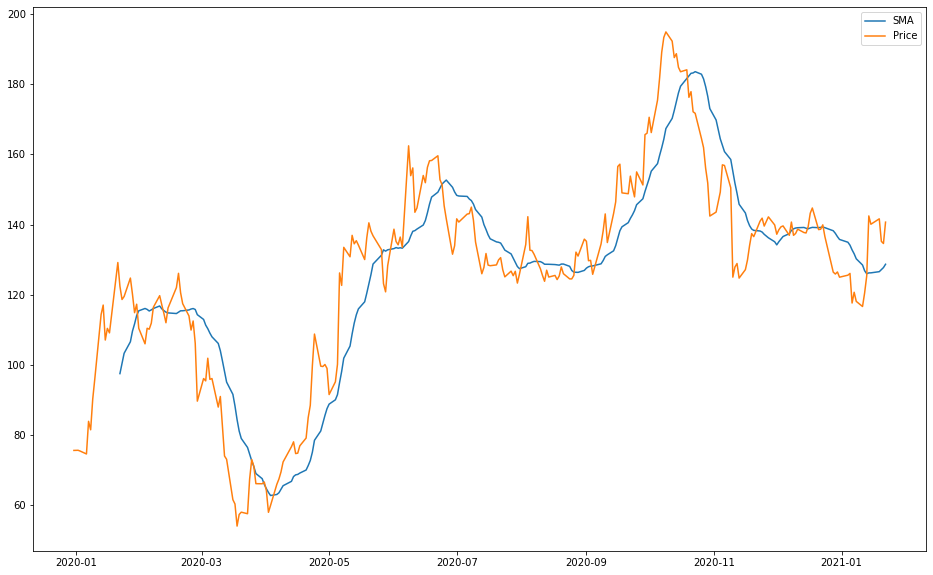

In [186]:
plt.figure(figsize=(16,10))
plt.plot(tsla["Date"], tsla["SMA"], label="SMA")
plt.plot(tsla["Date"], tsla["Close"], label="Price")
plt.legend()

In [187]:
tsla["int"] = tsla["Close"] - tsla["SMA"]

<ipython-input-187-c35dd1f6fe37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla["int"] = tsla["Close"] - tsla["SMA"]


In [188]:
tsla.dropna(inplace=True)
tsla.reset_index(drop=True, inplace=True)

<ipython-input-188-42ea8c626404>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla.dropna(inplace=True)


In [189]:
l = tsla["int"].tolist()

buys={}
sells={}
position = None
profit = 0

for i in range(len(l)):
    c = l[i]
    p = l[i-1]
    
    current_price = tsla.iloc[i]["Close"]
    
    if c < 0 and p > 0:
        sells.update({i:current_price})
        position="Sell"
        
        if len(buys) > 0:
            last_buy = buys[max(buys.keys())]
            
            print("Entering Price: ", last_buy )
            print("Exit Price: ", current_price)
            print("Position: Buy")
            print("Profit: ", current_price - last_buy)
            print()
            profit += current_price - last_buy
        
    elif c> 0 and p <0:
        buys.update({i:current_price})
        position="Buy"
        
        if len(sells) > 0:
            last_sell = sells[max(sells.keys())]
            
            print("Entering Price: ", last_sell )
            print("Exit Price: ", current_price)
            print("Position: Sell")
            print("Profit: ", last_sell - current_price)
            print()
            profit += last_sell - current_price
            
    if i == len(l) - 1:
        if position == "Buy":
            sells.update({i:current_price})
            last_buy = buys[max(buys.keys())]
            print("Entering Price: ", last_buy )
            print("Exit Price: ", current_price)
            print("Position: Buy")
            print("Profit: ", current_price - last_buy)
            print()
            profit += current_price - last_buy
        
        else:
            buys.update({i:current_price})
            
            last_sell = sells[max(sells.keys())]
            print("Entering Price: ", last_sell )
            print("Exit Price: ", current_price)
            print("Position: Sell")
            print("Profit: ", last_sell - current_price)
            print()
            profit += last_sell - current_price
            

Entering Price:  110.41999816894531
Exit Price:  116.44000244140625
Position: Sell
Profit:  -6.0200042724609375

Entering Price:  116.44000244140625
Exit Price:  114.7300033569336
Position: Buy
Profit:  -1.7099990844726562

Entering Price:  114.7300033569336
Exit Price:  116.22000122070312
Position: Sell
Profit:  -1.4899978637695312

Entering Price:  116.22000122070312
Exit Price:  113.95999908447266
Position: Buy
Profit:  -2.2600021362304688

Entering Price:  113.95999908447266
Exit Price:  73.0
Position: Sell
Profit:  40.959999084472656

Entering Price:  73.0
Exit Price:  66.12000274658203
Position: Buy
Profit:  -6.879997253417969

Entering Price:  66.12000274658203
Exit Price:  66.5999984741211
Position: Sell
Profit:  -0.4799957275390625

Entering Price:  66.5999984741211
Exit Price:  64.18000030517578
Position: Buy
Profit:  -2.4199981689453125

Entering Price:  64.18000030517578
Exit Price:  65.91999816894531
Position: Sell
Profit:  -1.7399978637695312

Entering Price:  65.91999816

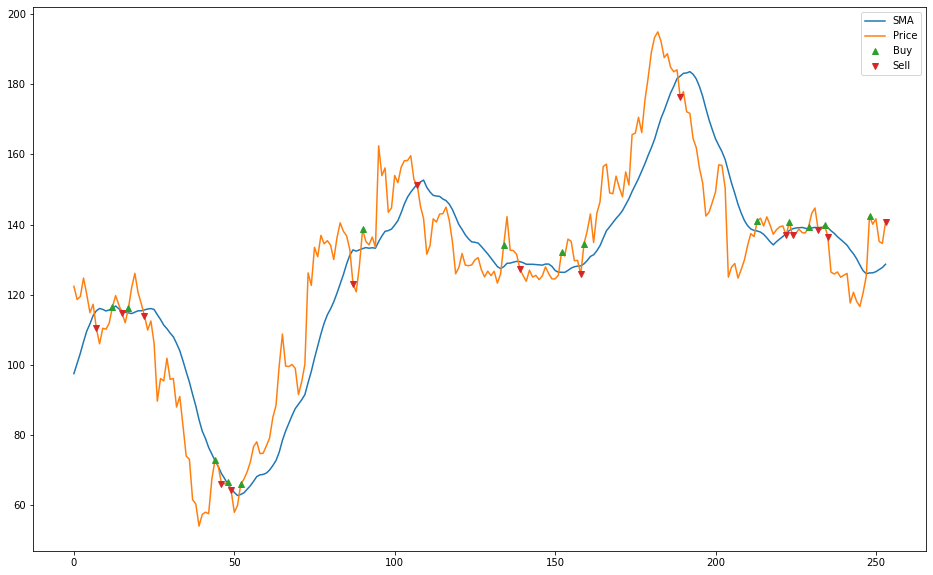

In [190]:
plt.figure(figsize=(16,10))
plt.plot(tsla["SMA"], label="SMA")
plt.plot(tsla["Close"], label="Price")
plt.plot(list(buys.keys()), list(buys.values()), "^", label="Buy")
plt.plot(list(sells.keys()), list(sells.values()), "v", label="Sell")
plt.legend()

In [191]:
# Strategy Profit
profit

112.79998779296875

In [192]:
#Buying one share
tsla.iloc[-1]["Close"] - tsla.iloc[0]["Close"]

18.29999542236328